# Plotting with Matplotlib

```{admonition} Interactive page
:class: warning, dropdown
This is an interactive book page. Press launch button at the top right side.
```

To start making our own plots with Matplotlib, we will need the [`pyplot` module](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) of `matplotlib`, which we import like this: 

```
import matplotlib.pyplot as plt
```

In the examples below, we will mainly showcase how to use Matplotlib to make scatter and line plots. To see example code for other plot types, check out Matplotlib's [plot types gallery](https://matplotlib.org/stable/plot_types/index.html).

## Matplotlib with NumPy

### Plotting one dataset

The [routine for making line plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) of your data is `plt.plot()`.
In its simplest form, you can just give an array and ask Python to plot it for you:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's again load time-voltage data and store columns in separate vectors
data = np.loadtxt("v_vs_time.dat")
t = data[:,0]
v = data[:,1]

# Simple line plot
plt.figure()
plt.plot(v)
plt.show()

```{admonition} plt.figure()
:class: note
Note that `plt.figure()` in the code above is not stricly necessary, as `plt.plot()` creates a new figure implicitly if one doesn't already exist. `plt.figure()` is needed when we want to create multiple figures in the same script, customize figure size and other properties, or create subplots. You will see examples of this below.
```

The *y*-axis is clearly the measured voltage. But what is the *x*-axis? If you give the `plt.plot()` command only one array, it will use that array data for the *y*-axis, and use the index number for the *x*-axis. Since our dataset has 1,000 points, the *x*-axis runs from 0 to 1000. 

This seems quite obvious now that we know, but it's not obvious at all just from looking at the plot. Remember: we should **ALWAYS add axes labels to our plots!**
To do this, you can use the `plt.xlabel()` and `plt.ylabel()` commands:

In [ ]:
# Line plot with axes labels
plt.figure()
plt.plot(v)
plt.xlabel("Point number")
plt.ylabel("Voltage (V)")
plt.show()

Sometimes it's also useful to add a grid to your plots - this depends on the data you're showing, and whether grids are cluttering or aiding in reading the plot. To add grids, use `plt.grid()`.

In [ ]:
# Line plot with axes labels and grids
plt.figure()
plt.plot(v)
plt.xlabel("Point number")
plt.ylabel("Voltage (V)")
plt.grid()
plt.show()

What if we want to actually plot the voltage vs. time, and not point number? For this, we need to give `plt.plot()` **two arguments**. We also want to plot the data as **points** instead of a connected line. We can do this by adding `'.'` after arrays in `plt.plot()`. 
In the code below, try to change `plt.plot(t,v,'k.',markersize=1)` by changing `k.` into `r.` or `g.`, and changing markersize.

In [ ]:
# Time vs. voltage plot with axes labels
plt.figure()
plt.plot(t, v, 'k.', markersize=1)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

All graphs so far have been displayed within our Python environment. But what if we wanted to use this plot in a document?
Fortunately, Matplotlib has functions that easily allow you to **save your plot** in PNG or PDF formats, perfect for importing them into Word, [LaTeX](https://en.wikipedia.org/wiki/LaTeX), or another type of document you use (e.g., for reporting your lab data). To save a plot, you can use `plt.savefig('plot_name.png')` or `plt.savefig('plot_name.pdf')`.

```
plt.figure()
plt.plot(t,v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig("myplot.pdf")
plt.show()
```

Do you want a different point size? Or a different symbol? You can see how to change all of this by looking at the [documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) of the plot function, or by bringing up the built-in help with `?`.


### Plotting multiple datasets in one plot

You may want to plot more than one thing in your plot. To do this, you simply have to **run the plot command twice**:

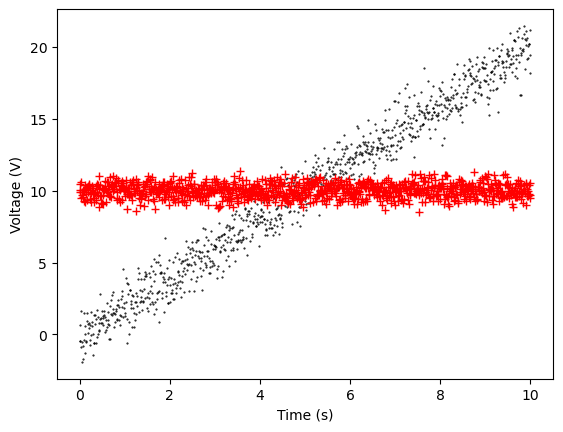

In [19]:
# A "fake" dataset to illustrate plotting
v2 = np.random.normal(10, 0.5, 1000)

plt.figure()
plt.plot(t, v, 'k.', markersize=1)
plt.plot(t, v2, 'r+')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Matplotlib will automatically change the color of the second dataset (you can also control this manually, see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)). In that case, as we mentioned, we must add a legend to our plot. Furthermore, if you want a really big figure, you can also adjust the figure size:

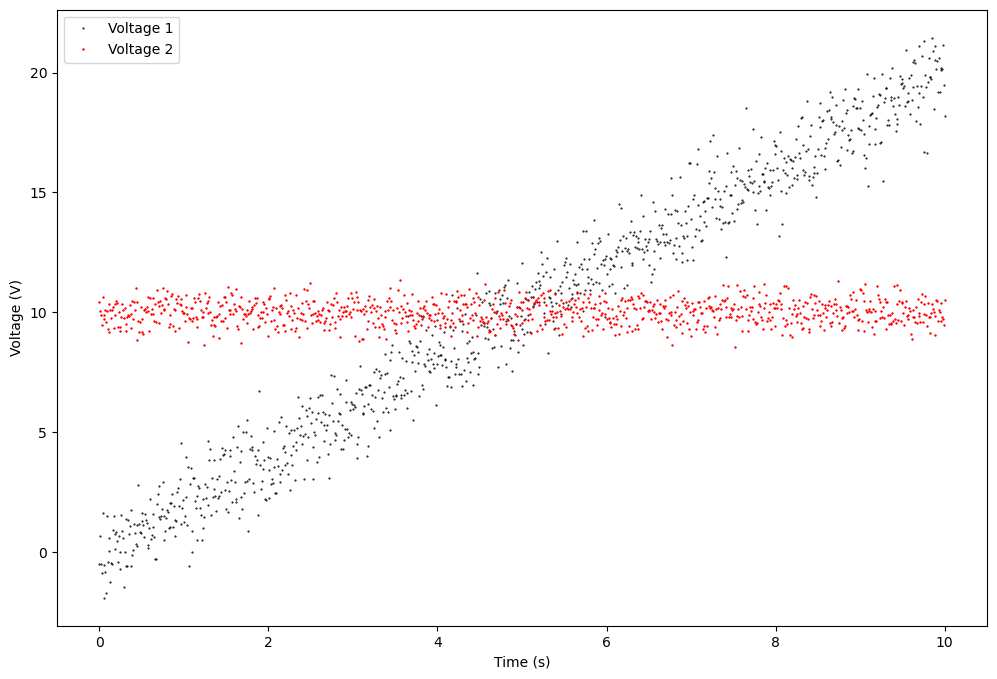

In [20]:
# A large scatter plot with two datasets, axes lables, and a legend
plt.figure(figsize=(12,8))
plt.plot(t, v, 'k.', markersize=1, label="Voltage 1")
plt.plot(t, v2, 'r+', markersize=1, label="Voltage 2")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

### Plotting functions 

Often in science, we go through a long mathematical derivation to come up with a formula describing a phenomenon. Sometimes this formula is very complicated, so it's handy to be able to plot the formula to get a feeling for what the function looks like. 

We've learned above how to plot data, but how do we plot a function in Python?

It turns out it is actually pretty easy. Let's look at a concrete example: let's plot the height of a [projectile](https://en.wikipedia.org/wiki/Projectile) as a function of the distance it travels. Using Newton's laws, we can find that the projectile's [trajectory](https://en.wikipedia.org/wiki/Trajectory#Uniform_gravity,_neither_drag_nor_wind) is given by: 

$$
y = -\frac{g}{2 v_0^2 \cos^2 \theta} x^2 + x \tan \theta
$$

The first step is to make a NumPy array `x` that includes the points at which we want to evaluate (calculate) the function. Let's guess and say we want to look in the range of $x$ from 0 to 12 meters. We also need to pick the number of points: to get a smooth curve, let's pick 1,000 points:

In [ ]:
x = np.linspace(0, 12, 1000)

Now we want to calculate $y$ for all of these $x$ points. Let's say we pick an angle of 45 degrees and an initial velocity $v_0$ of 10 m/s. We can then directly use NumPy "vectorized" calculations to calculate the values of `y` for all of our `x` points using a single line of code: 

In [ ]:
# Parameters
v0 = 10 # m/s
theta = 45/180*np.pi # Python works with angles in Radians, and np.pi = pi (3.14596...)
g = 9.8 # m/s^2

# A vectorized calculation to calculate y for all values of x
y = -g/(2*v0**2*np.cos(theta)**2)*x**2 + x*np.tan(theta)

Now, let's plot it!

In [ ]:
plt.figure()
plt.plot(x, y)
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.axhline(0, ls=":", c="grey") # horizontal grey line
plt.show()

We can now also see how easy it is to **combine plotting functions with plotting data**. For example, in our voltage data above, if we want to plot a straight line function over the data: 

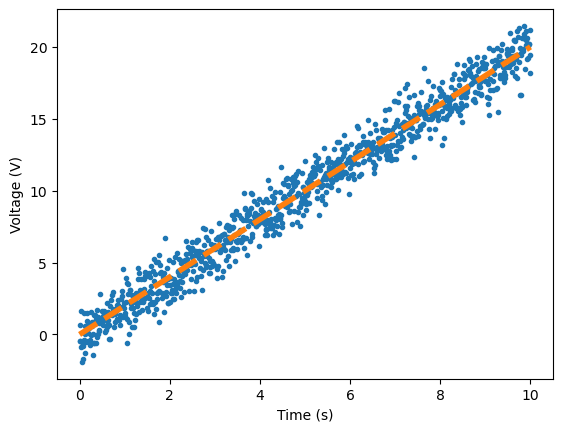

In [22]:
line = 2*t
plt.figure()
plt.plot(t, v, '.')
plt.plot(t, line, '--', lw=2)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

(This is actually a plot we've [already seen](../chapter10/data-visualization.ipynb), so now you know the type of code that produced it!)

Here, we also used the `linewidth` parameter (which can be shorted to `lw` to save typing) to make the line a bit wider so it is easier to see, and used the `'--'` plot format specifier to make it a dashed line. 

## Matplotlib with pandas

All Matplotlib plots above were made with input data stored in NumPy arrays. However, we mentioned that Matplotlib also works with pandas. Let's look at the same time-voltage plotting example, but this time imported using pandas. In the code, notice how you can seamlessly **select columns from your pandas DataFrame** for plotting. Notice also that we can **add names to DataFrame columns** if they're missing (as is the case with the time-voltage file).

In [ ]:
import pandas as pd

# Import data as data frame voltage time (df_vt). File has no column names, so header=None.
# Also specify that delimiter is not a default comma for CSVs, but a space.
df_vt = pd.read_csv("v_vs_time.dat", header=None, delimiter=" ")

# Add names to columns
df_vt.columns =['Time (s)', 'Voltage (V)']

df_vt.head(5)

In [ ]:
# Plotting the data
plt.plot(df_vt['Time (s)'], df_vt['Voltage (V)'], '.', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

## Different ways to use Matplotlib

So far, we've been plotting with `plt.`. If you start looking online for plotting code using Matplotlib, you will see that there are **different ways** of drawing plots with Matplotlib (see [this Stack Overflow post](https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl)). It's good to be aware of these differences, so we'll here briefly touch upon them. In practice, when more than one way can be used to produce a plot, **you can choose** whichever way of plotting you wish, as long as it produces a correct plot. 

These are three methods which produce the same plot:

```
# 1st method
plt.plot(x, y)

# 2nd method
ax = plt.subplot()
ax.plot(x, y)

# 3rd method
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(x, y)

```

To understand each of them, it's useful to understand Matplotlib's vocabulary.

Principal objects in Matplotlib are **figure** and **axes** (note that *axes* is a bit of a misleading term, as you may be thinking of *x*- and *y*-axes, but that's not what axes in Matplotlib are):
- **A figure is like a canvas** - you specify its dimensions, background color, etc. You use it by placing other objects on it (mostly axes, but also text labels, etc.), and save its contents with `savefig`.
- **Axes** offers "tools" such as `.plot`, `.scatter`, and `.hist`. You can place one or several axes inside a figure.


```{figure} ../images/chapter10/fig-ax.png
---
height: 350px
name: fig-ax
---
Visualizing Matplotlib figure and axes (not to be confused with *x*- and *y*-axes).
```

### First method

```
plt.plot(x, y)
```

The first method based on Pyplot is the simplest. When you call `plt.plot(x, y)`, Matplotlib implicitly creates a figure and an axes object if they don't already exist. 

Sometimes, this simple method is sufficient, e.g., when you are doing exploratory plotting of your data or **quickly generating uncomplicated plots**.

In [ ]:
# Voltage data plotting - 1st method
plt.plot(t, v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

### Second method

```
ax = plt.subplot()
ax.plot(x, y)
```

The second method creates a subplot (which is specific axes within a figure) using `plt.subplot()`. In the first line of code, `plt.subplot()` returns an axes object `ax`, which you can use to call plotting methods in the second line. This way, you have explicit control over the axes object, allowing more customization and clarity when managing multiple plots. 

This method is appropriate when you need **more control over the axes** and are creating multiple subplots.

In [ ]:
# Voltage data plotting - 2nd method
ax = plt.subplot()
ax.plot(t, v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Let's see how we can plot two subplots one next to another. The three digits in `plt.subplot` denote:
1. number of rows
2. number of columns
3. subplot number

Therefore, with `plt.subplot(1, 2, 1)` and `plt.subplot(1, 2, 2)`, we're telling Matplotlib that we'll have one row and two columns (i.e., subplots side by side). First we plot the one with data `(t, v)`, then one with data `(t, v2)` (the "fake" voltage).

Note: the range of the *y*-axis is automatically rescaled, so we use `set_ylim` to make *y* comparable between the subplots.

In [ ]:
# Voltage data plotting with subplots - 2nd method
ax1 = plt.subplot(1, 2, 1)
ax1.plot(t, v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
ax1.title.set_text('Voltage 1') # Subplot title

ax2 = plt.subplot(1, 2, 2)
ax2.plot(t, v2)
plt.xlabel("Time (s)")
ax2.title.set_text('Voltage 2') # Subplot title
ax.set_ylim([0,20]) # Set y range to 0-20

plt.show()

```{exercise}
:class: dropdown
In the code above with two subplots, try to make the subplots appear one below another rather than side by side. To do this, tinker with the numbers inside `plt.subplot`.
```

### Third method

```
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(x, y)
```

The third method starts by explicitly creating a figure object with `plt.figure()` (remember, we've also seen this line above, even though it wasn't always necessary). In the second line, it then adds a subplot to this figure using `figure.add_subplot(111)`, where 111 means a grid with **one** row, **one** column, and this is the **first** subplot. In the last line, we then plot the data. 

This method provides **the most control over both the figure and axes objects**. You can specify figure-level attributes (like size) and axes-level attributes (like position within the figure). You can use this method for complex plotting scenarios, where you need control over the figure and axes, or when dealing with multiple figures and subplots.

In [ ]:
# Voltage data plotting subplots - 3rd method
figure = plt.figure()

ax1 = figure.add_subplot(121)
ax1.plot(t, v)
ax1.title.set_text('Voltage 1')

ax2 = figure.add_subplot(122)
ax2.plot(t, v2)
ax2.title.set_text('Voltage 2')
ax2.set_ylim([0,20])

In [ ]:
import micropip
await micropip.install("jupyterquiz")
from jupyterquiz import display_quiz
import json

with open("questions2.json", "r") as file:
    questions=json.load(file)
    
display_quiz(questions, border_radius=0)